---
<center>

  # **Ejercicio 01**

---
**Realizado Por:**

   Samuel Huertas Rojas

---
</center>

# 1.

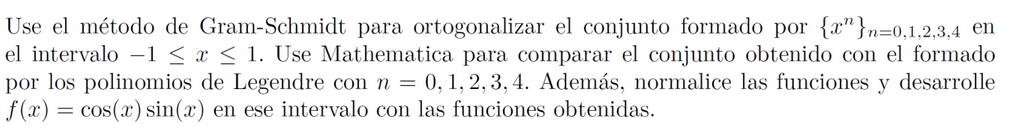

Para resolver este problema se va a definir la base formada por ${\ket{u_n}} = [x^n]_{n=0,....,4}$, se puede demostrar está base no es ortonormal, ya que una base ortonormal debe de cumplir:<br>

<center>

$ \braket{u_i | u_j} = \int_{-\infty}^{\infty} u_i^{*}(\vec{r})u_j^{*}(\vec{r}) d\vec{r} = \delta_{ij}$

</center>

Observamos que esta base no cumple con esta condición:

* $\braket{u_0 | u_0} = \int_{-1}^{1} (1^{*}) 1 dx = 2$
* $\braket{u_0 | u_1} = \int_{-1}^{1} (1^{*}) x dx = 0$
* $\braket{u_0 | u_2} = \int_{-1}^{1} (1^{*}) x^2 dx = \frac{2}{3}$


Por lo que la la base ${\ket{u_n}}$ no es un base ortonormal, aplicando el metodo de Gram-Schmidt, se peude encontrar una base ortonormal:

1. $\ket{\xi_0} = \ket{u_0} = 1$
2. $\ket{\xi_1} =  \ket{u_1} - \frac{\braket{u_0 | u_1}}{\braket{u_0 | u_0}} \ket{u_0} = x - \frac{\int_{-1}^{1} (1^{*}) x dx}{\int_{-1}^{1} (1^{*}) 1 dx} = x$
3. $\ket{\xi_2} =  \ket{u_2} - \frac{\braket{u_1 | u_2}}{\braket{u_1 | u_1}} \ket{u_1}  - \frac{\braket{u_0 | u_2}}{\braket{u_0 | u_0}} \ket{u_0} = x^2 - \frac{\int_{-1}^{1} (x^{*}) x^2 dx}{\int_{-1}^{1} (x^{*})x  dx} - \frac{\int_{-1}^{1} (1^{*}) x^2 dx}{\int_{-1}^{1} (1^{*}) 1 dx} = x^2 -1/3$
<br> $\vdots$

Metodo de Gram-Schmidt de forma general: <br>
<center>

$\ket{\xi_k} = \ket{u_k} - \sum_{j=1}^{k-1} \frac{\braket{\xi_j | u_k}}{\braket{\xi_j | \xi_j}} \ket{\xi_j} $

</center>

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = sp.symbols("x")


def gram_schmidt_functions(funcs, var, a, b):
    """
    Aplica el método de Gram-Schmidt a una lista de funciones simbólicas.
    funcs : lista de funciones de sympy
    var   : variable de integración
    a, b  : límites del intervalo
    Devuelve una lista de funciones ortonormales.
    """
    bases = []

    for f in funcs:
        u = f
        # Restar proyecciones sobre los anteriores
        for q in bases:
            inner_fq = sp.integrate(u * q, (var, a, b))  # Producto interno <f, q>
            inner_qq = sp.integrate(q * q, (var, a, b))  # Producto interno <q, q>
            u = u - (inner_fq / inner_qq) * q

        q = sp.simplify(u)
        bases.append(q)

    return bases


# Ejemplo: funciones 1, x, x^2, x^3, x^4 en [-1, 1]
funcs = [1, x, x**2, x**3, x**4]
base_n = gram_schmidt_functions(funcs, x, -1, 1)

print("Funciones ortonormales:")

for i, q in enumerate(base_n):
    sp.pprint(sp.latex(q))
    print(f"Norma: {sp.simplify(sp.integrate(q * q, (x, -1, 1)))}\n")


Funciones ortonormales:
1
Norma: 2

x
Norma: 2/3

x^{2} - \frac{1}{3}
Norma: 8/45

x \left(x^{2} - \frac{3}{5}\right)
Norma: 8/175

x^{4} - \frac{6 x^{2}}{7} + \frac{3}{35}
Norma: 128/11025



Ahora toca normalizar las funciones ya que si miramos la norma está va a dar distinta de 1: <br>



In [3]:
def normalizar_funciones(funcs, var, a, b):
    """
    Normaliza una lista de funciones simbólicas.
    funcs : lista de funciones de sympy
    var   : variable de integración
    a, b  : límites del intervalo
    Devuelve una lista de funciones normalizadas.
    """
    normalizadas = []
    for f in funcs:
        norm = sp.sqrt(sp.integrate(f * f, (var, a, b)))
        f_normalizada = f / norm
        normalizadas.append(f_normalizada)
    return normalizadas


base_ortonormal = normalizar_funciones(base_n, x, -1, 1)
for q in base_ortonormal:
    print(q)

sqrt(2)/2
sqrt(6)*x/2
3*sqrt(10)*(x**2 - 1/3)/4
5*sqrt(14)*x*(x**2 - 3/5)/4
105*sqrt(2)*(x**4 - 6*x**2/7 + 3/35)/16


In [4]:
# Funciones de Legendre
from scipy.special import legendre

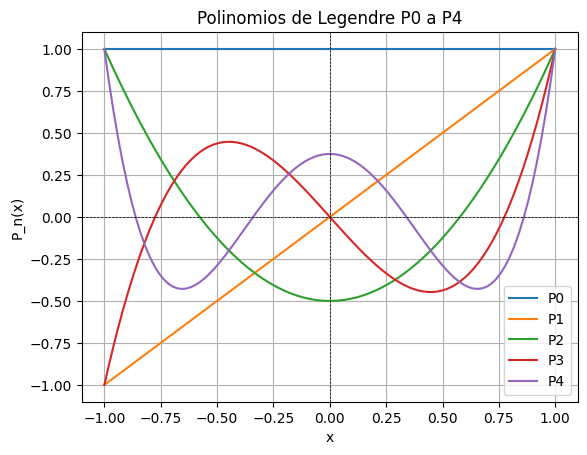

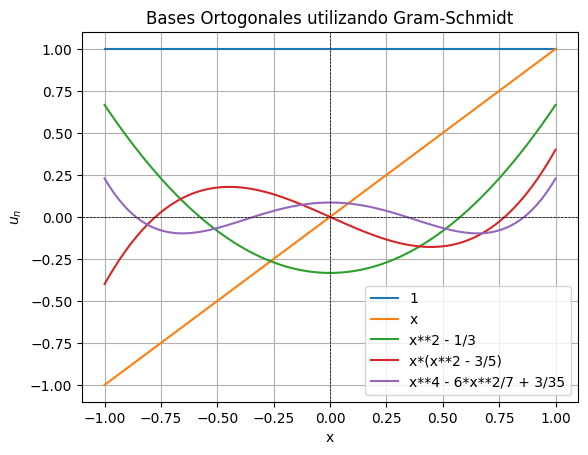

In [5]:
variable_x = np.linspace(-1, 1, 100)

# Polinomios de Legendre P0 a P4
legendre_polys = [legendre(n) for n in range(5)]
for p in legendre_polys:
    plt.plot(variable_x, p(np.linspace(-1, 1, 100)), label=f"P{p.order}")

plt.title("Polinomios de Legendre P0 a P4")
plt.xlabel("x")
plt.ylabel("P_n(x)")
plt.axhline(0, color="black", lw=0.5, ls="--")
plt.axvline(0, color="black", lw=0.5, ls="--")
plt.legend()
plt.grid()
plt.show()

for pos, q in enumerate(base_n):
    fun_lambdified = sp.lambdify(x, q)
    fun_graph = fun_lambdified(variable_x)
    if pos == 0:
        plt.plot(variable_x, np.ones(len(variable_x)), label=q)
    else:
        plt.plot(variable_x, fun_graph, label=q)

plt.title("Bases Ortogonales utilizando Gram-Schmidt")
plt.xlabel("x")
plt.ylabel("$u_n$")
plt.axhline(0, color="black", lw=0.5, ls="--")
plt.axvline(0, color="black", lw=0.5, ls="--")
plt.legend()
plt.grid()
plt.show()

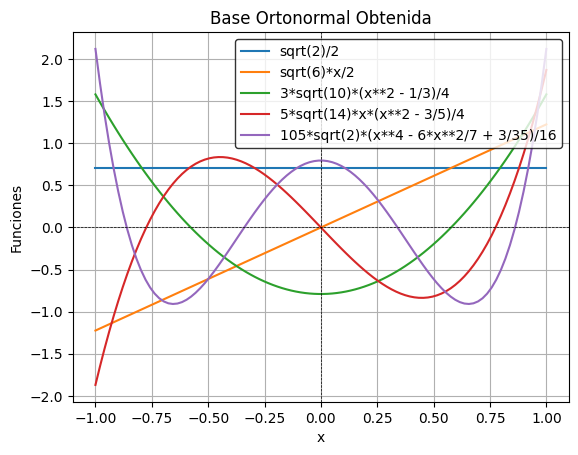

In [6]:
# Mostrar la base ortonormal obtenida
for q in base_ortonormal:
    fun_lambdified = sp.lambdify(x, q)
    fun_graph = fun_lambdified(variable_x)
    if fun_graph.shape == ():
        y = np.ones_like(variable_x) * fun_graph
        plt.plot(variable_x, y, label=str(q))
    else:
        plt.plot(variable_x, fun_graph, label=str(q))

plt.title("Base Ortonormal Obtenida")
plt.xlabel("x")
plt.ylabel("Funciones")
plt.axhline(0, color="black", lw=0.5, ls="--")
plt.axvline(0, color="black", lw=0.5, ls="--")
plt.legend(
    loc="upper right",
    frameon=True,  # mostrar recuadro
    facecolor="white",  # color de fondo
    edgecolor="black",  # color del borde
)
plt.grid()
plt.show()


In [7]:
# Verificación de ortogonalidad de la base obtenida
for i in range(len(base_ortonormal)):
    for j in range(len(base_ortonormal)):
        prod_interno = sp.simplify(
            sp.integrate(base_ortonormal[i] * base_ortonormal[j], (x, -1, 1))
        )
        print(f"Producto interno <q_{i}, q_{j}> = {prod_interno}")

Producto interno <q_0, q_0> = 1
Producto interno <q_0, q_1> = 0
Producto interno <q_0, q_2> = 0
Producto interno <q_0, q_3> = 0
Producto interno <q_0, q_4> = 0
Producto interno <q_1, q_0> = 0
Producto interno <q_1, q_1> = 1
Producto interno <q_1, q_2> = 0
Producto interno <q_1, q_3> = 0
Producto interno <q_1, q_4> = 0
Producto interno <q_2, q_0> = 0
Producto interno <q_2, q_1> = 0
Producto interno <q_2, q_2> = 1
Producto interno <q_2, q_3> = 0
Producto interno <q_2, q_4> = 0
Producto interno <q_3, q_0> = 0
Producto interno <q_3, q_1> = 0
Producto interno <q_3, q_2> = 0
Producto interno <q_3, q_3> = 1
Producto interno <q_3, q_4> = 0
Producto interno <q_4, q_0> = 0
Producto interno <q_4, q_1> = 0
Producto interno <q_4, q_2> = 0
Producto interno <q_4, q_3> = 0
Producto interno <q_4, q_4> = 1


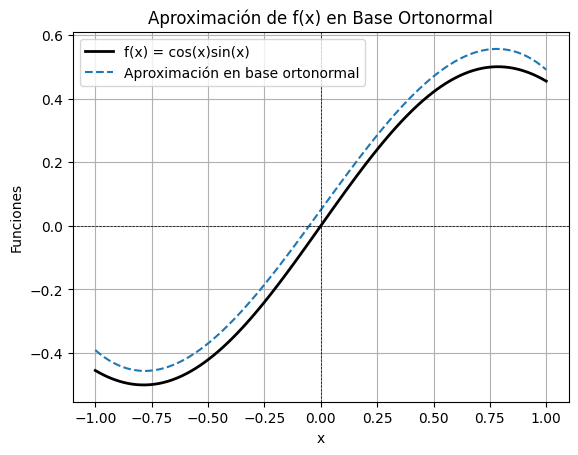

In [8]:
# Definición de la función f(x) = cos(x)sen(x)
f = sp.cos(x) * sp.sin(x)

# Obtener los coeficientes de la expansión en la base ortonormal
coeficientes = []
for q in base_ortonormal:
    coef = sp.simplify(sp.integrate(f * q, (x, -1, 1)))
    coeficientes.append(coef)

# Graficar la función original y su aproximación
f_lambdified = sp.lambdify(x, f)  # Función original
f_graph = f_lambdified(variable_x)  # Evaluar en variable_x
plt.plot(
    variable_x, f_graph, label="f(x) = cos(x)sin(x)", color="black", linewidth=2
)  # Graficar función original

f_approx = sum(
    c * q for c, q in zip(coeficientes, base_ortonormal)
)  # Aproximación en base ortonormal
f_approx_lambdified = sp.lambdify(x, f_approx)  # Función aproximada
f_approx_graph = f_approx_lambdified(variable_x)  # Evaluar en variable_x

plt.plot(
    variable_x,
    f_approx_graph + 0.05,
    label="Aproximación en base ortonormal",
    linestyle="--",
)  # Graficar aproximación
plt.title("Aproximación de f(x) en Base Ortonormal")
plt.xlabel("x")
plt.ylabel("Funciones")
plt.axhline(0, color="black", lw=0.5, ls="--")
plt.axvline(0, color="black", lw=0.5, ls="--")
plt.legend()
plt.grid()
plt.show()

In [9]:
# Medir el error cuadratico medio de la aproximación encontrada
def error_cuadratico_medio(y1, y2):
    """
    Calcula el error cuadrático medio (MSE) entre dos series de puntos.

    Parámetros
    ----------
    y1 : array-like
        Valores de la primera gráfica.
    y2 : array-like
        Valores de la segunda gráfica.

    Retorna
    -------
    mse : float
        Error cuadrático medio.
    """
    y1 = np.array(y1)
    y2 = np.array(y2)

    if y1.shape != y2.shape:
        raise ValueError("Las dos series deben tener la misma longitud")

    mse = np.mean((y1 - y2) ** 2)
    return mse

In [10]:
error_aprox = error_cuadratico_medio(f_graph, f_approx_graph)

print(f"El MSE: {error_aprox}")

El MSE: 2.1094160232088182e-05


# 2.

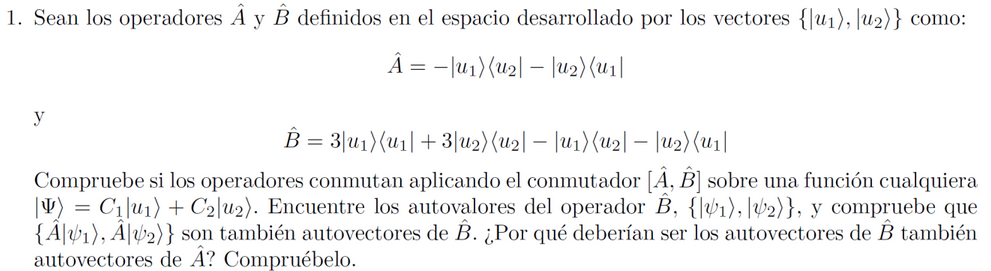

Tenemos que la base ${\ket{u_1}, \ket{u_2} }$ cumplen con:
* $ \braket{u_1 | u_1} = 1 $
* $ \braket{u_1 | u_2} = 0 $
* $ \braket{u_2 | u_1} = 0 $
* $ \braket{u_2 | u_2} = 1 $ 

Los operadores $\hat{A}, \hat{B}$ se definen como: 
<center>

$\hat{A} = -\ket{u_1}\bra{u_2} - \ket{u_2}\bra{u_1}  $

$\hat{B} = 3\ket{u_1}\bra{u_1} + 3\ket{u_2}\bra{u_2} - \ket{u_1}\bra{u_2} - \ket{u_2}\bra{u_1}  $

</center>

PAra encontrar los elementos de matriz de cada uno de los operadores se realiza el siguiente procedimiento:

* $\hat{A} =  \begin{bmatrix}
 \bra{u_1}\hat{A}\ket{u_1} & \bra{u_1}\hat{A}\ket{u_2} \\
 \bra{u_2}\hat{A}\ket{u_1} & \bra{u_2}\hat{A}\ket{u_2}
\end{bmatrix}$

Este mismo procedimiento se realiza con el operador $\hat{B}$

Con la función $\ket{\Psi} = C_1 \ket{u_1} + C_2 \ket{u_2} $ <br>

Para comprobar que los operadores $\hat{A}, \hat{B}$ conmutan se debe de desarrollar: <br>

$[\hat{A}, \hat{B}] \ket{\Psi} = \hat{A}\hat{B} \ket{\Psi} - \hat{B}\hat{A} \ket{\Psi} $

In [27]:
# Defimición de las bases
u1 = np.array([[1, 0]])
u2 = np.array([[0, 1]])

# Rectificación de la ortonormalidad de la base
print(f"Producto interno <u1|u1> = {np.dot(u1, u1.T)[0][0]}")
print(f"Producto interno <u1|u2> = {np.dot(u1, u2.T)[0][0]}")
print(f"Producto interno <u2|u1> = {np.dot(u2, u1.T)[0][0]}")
print(f"Producto interno <u2|u2> = {np.dot(u2, u2.T)[0][0]}")

# Definición de los operadores
operador_A = -u1 * u2.T - u2 * u1.T
operador_B = 3 * u1 * u1.T + 3 * u2 * u2.T - u1 * u2.T - u2 * u1.T

print(f"Operador A: \n{operador_A}")
print(f"Operador B: \n{operador_B}")

Producto interno <u1|u1> = 1
Producto interno <u1|u2> = 0
Producto interno <u2|u1> = 0
Producto interno <u2|u2> = 1
Operador A: 
[[ 0 -1]
 [-1  0]]
Operador B: 
[[ 3 -1]
 [-1  3]]


In [28]:
# Defunición de la función Psi
C1, C2 = sp.symbols("C1 C2")
Psi = C1 * u1 + C2 * u2
print(f"Función Psi: \n{Psi}")

Función Psi: 
[[C1 C2]]


In [29]:
# Conmutación de los operadores [A, B]
AB = np.dot(operador_A, np.dot(operador_B, Psi[0]))
BA = np.dot(operador_B, np.dot(operador_A, Psi[0]))
print(f"AB: \n{AB}")
print(f"BA: \n{BA}")
# Verificación de la conmutatividad
print(f"[A, B]Psi = AB*Psi - BA*Psi = {AB - BA}")

AB: 
[C1 - 3*C2 -3*C1 + C2]
BA: 
[C1 - 3*C2 -3*C1 + C2]
[A, B]Psi = AB*Psi - BA*Psi = [0 0]


Sabemos que para encontrar los autovectores de un operador $ \hat{A} \Longrightarrow \hat{A} \ket{\psi} = \lambda \ket{\psi} $

Para encontrar los autovalores de un operador lineal, $\hat{A}$ se debe de realizar: <br>
<center>

$ det[\hat{A} - \lambda I] = 0 $

</center>

In [30]:
# Encontrar los autovalores del operador B

# Definir el simbolo lambda
lambda_sym = sp.symbols("lambda")
# Matriz identidad I
identidad = sp.eye(operador_B.shape[0])

# Calcular el polinomio característico
polinomio_caracteristico = sp.Matrix(operador_B - lambda_sym * identidad).det()
raices = sp.solve(polinomio_caracteristico, lambda_sym)
print(f"Polinomio característico: {sp.factor(polinomio_caracteristico)}")
print(f"Lista de los facotres: {raices}")


Polinomio característico: (lambda - 4)*(lambda - 2)
Lista de los facotres: [2, 4]


Para encontrar los autovectores del operador $ \hat{A} $, se debe de realizar: <br>
<center>

$ (\hat{A }- \lambda I)v = 0 $

</center>

In [31]:
# Encontrar los autovalores y autovectores
autovalores, autovecotres = np.linalg.eig(operador_B)
print("Autovalores:")
print(autovalores)

print("\nAutovectores:")
print(autovecotres)

Autovalores:
[4. 2.]

Autovectores:
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


El  ``` eigvecs[:, i] ``` es el autovector correspondiente al autovalor ``` eigvals[i]```

In [32]:
autovecotres[:, 1].T

array([0.70710678, 0.70710678])

Ahora comprobemos que $ [\hat{A}\psi_1, \hat{A}\psi_2] $ también es autovector de $\hat{B}$

In [33]:
psi1 = operador_A @ autovecotres[:, 0].T
psi2 = operador_A @ autovecotres[:, 1].T

print(f"Autovectores viejos \nPsi1: {autovecotres[:, 0]} \nPsi2: {autovecotres[:, 1]}")
print(f"Nuevos autovectores \nPsi1': {psi1} \nPsi2': {psi2}")

Autovectores viejos 
Psi1: [ 0.70710678 -0.70710678] 
Psi2: [0.70710678 0.70710678]
Nuevos autovectores 
Psi1': [ 0.70710678 -0.70710678] 
Psi2': [-0.70710678 -0.70710678]


Comprobar si los nuevos vectores son autovectores de $\hat{B}$. Para que sea un autovector este debe de cumplir que: <br>

$\hat{B} \ket{\Psi'} = c \ket{\Psi'}$

In [ ]:
comprobar_psi1 = operador_B @ psi1 / 4
print(f"{comprobar_psi1}")
print(f"El autovector psi1: {psi1}")

  [ 0.70710678 -0.70710678]
El autovector psi1: [ 0.70710678 -0.70710678]


In [35]:
comprobar_psi2 = operador_B @ psi2 / 2
print(comprobar_psi2)
print(f"El autovector psi2: {psi2}")

[-0.70710678 -0.70710678]
El autovector psi2: [-0.70710678 -0.70710678]


Para responder a la pregunta de por qué deberían ser los autovectores de $\hat{B}$ también autovecotorers de $\hat{A}$, tenemos que utilizar el teorema #1, el cual nos dice que si dos operadores conmutan y $\ket{\Psi}$ es autofunción de uno de los operadores, entonces se cumple que $\hat{B} \ket{\Psi}$ es autovector de $\hat{A}$. Para comprobar los autovectores $\ket{\Psi_1}$ y $\ket{\Psi_2}$, deben de cumplir: 

$\hat{A} \ket{\Psi_1} = a \ket{\Psi_1}$

In [20]:
comprobar_autovector_psi1 = operador_A @ autovecotres[:, 0]
comprobar_autovector_psi2 = operador_A @ autovecotres[:, 1]

print(comprobar_autovector_psi1)
print(comprobar_autovector_psi2)

[ 0.70710678 -0.70710678]
[-0.70710678 -0.70710678]


# 3.

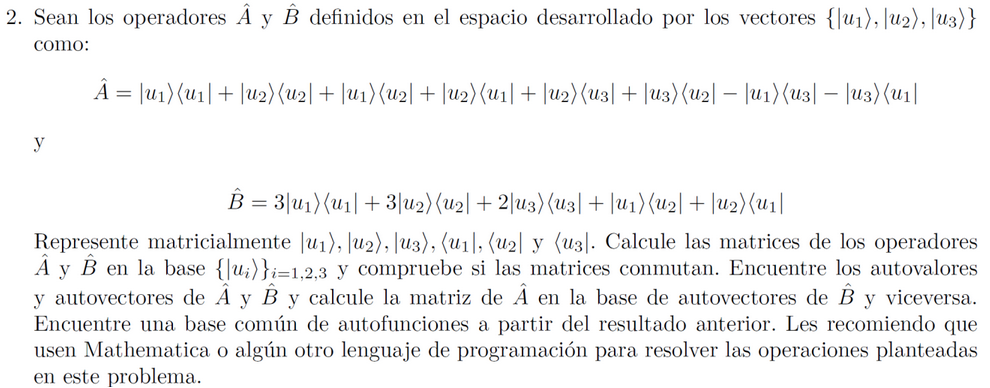

In [36]:
# Definición matricial de los vectores u1, u1 y u3
u1 = np.array([[1, 0, 0]])
u2 = np.array([[0, 1, 0]])
u3 = np.array([[0, 0, 1]])

# Definición de los operadores A y B
operador_A = (
    u1 * u1.T
    + u2 * u2.T
    + u1 * u2.T
    + u2 * u1.T
    + u2 * u3.T
    + u3 * u2.T
    - u1 * u3.T
    - u3 * u1.T
)
operador_B = 3 * u1 * u1.T + 3 * u2 * u2.T + 2 * u3 * u3.T + u1 * u2.T + u2 * u1.T

print(f"Operador A: \n{operador_A}")
print(f"Operador B: \n{operador_B}")

Operador A: 
[[ 1  1 -1]
 [ 1  1  1]
 [-1  1  0]]
Operador B: 
[[3 1 0]
 [1 3 0]
 [0 0 2]]


In [37]:
# Verificación de la conmutación de los operadores [A, B]
c1, c2, c3 = sp.symbols("c1 c2 c3")
Psi = c1 * u1 + c2 * u2 + c3 * u3

AB = np.dot(operador_A, np.dot(operador_B, Psi[0]))
BA = np.dot(operador_B, np.dot(operador_A, Psi[0]))

print(f"[A, B]Psi = AB - BA = {AB - BA}")

if np.array_equal(AB, BA):
    print("Los operadores A y B conmutan.")
else:
    print("Los operadores A y B no conmutan.")


[A, B]Psi = AB - BA = [0 0 0]
Los operadores A y B conmutan.


In [38]:
# Encontrar los autovectores y autovales de los operadores A y B
autovaloresA, autovectoresA = np.linalg.eig(operador_A)
autovaloresB, autovectoresB = np.linalg.eig(operador_B)

print(
    f"Para el operador A se tienen como autovalores: {autovaloresA} \nAutovectores de A: \n{autovectoresA}"
)
print(
    f"Para el operador B se tienen como autovalores: {autovaloresB} \nAutovectores de B: \n{autovectoresB}"
)

Para el operador A se tienen como autovalores: [-1.41421356  2.          1.41421356] 
Autovectores de A: 
[[ 5.00000000e-01 -7.07106781e-01 -5.00000000e-01]
 [-5.00000000e-01 -7.07106781e-01  5.00000000e-01]
 [ 7.07106781e-01  1.62785904e-16  7.07106781e-01]]
Para el operador B se tienen como autovalores: [4. 2. 2.] 
Autovectores de B: 
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


Del anterior resultado se puede evidenciar que el operador $\hat{B}$ está degenerado, ya que tiene un autovalor repetido.

In [39]:
# Autovectores de B
autovetorB1 = autovectoresB[:,0]
autovetorB2 = autovectoresB[:,1]
autovetorB3 = autovectoresB[:,2]

# Autovecotres de A 
autovetorA1 = autovectoresB[:,0]
autovetorA2 = autovectoresA[:,1]
autovetorA3 = autovectoresA[:,2]

Siendo el conjunto de autofunciones del operador $\hat{B} = [\phi_i]_{i=1,2,3}$, se puede calcular el operador $\hat{A}$ con las autofunciones del operador $\hat{B}$ de la siguiente forma:

<center>

$\hat{A'}_{mn} = \braket{\phi_m | \hat{A} | \phi_n} $

</center>

In [40]:
# Calculo del operador A en la base de autofunciones del operador B
nuevo_operador_A = np.zeros_like(operador_A)
nuevo_operador_B = np.zeros_like(operador_B)
for i in range(len(autovaloresB)):
    for j in range(len(autovaloresB)):
        nuevo_operador_A[i,j] = autovectoresB[:,i] @ operador_A @ autovectoresB[:,j]
        nuevo_operador_B[i,j] = autovectoresA[:,i] @ operador_B @ autovectoresA[:,j]


print(f"La matriz del operador A calculada con los autovectores del operador B es: \n{nuevo_operador_A}")
print(f"La matriz del operador B calculada con los autovectores del operador A es: \n{nuevo_operador_B}")

La matriz del operador A calculada con los autovectores del operador B es: 
[[1 0 0]
 [0 0 1]
 [0 1 0]]
La matriz del operador B calculada con los autovectores del operador A es: 
[[1 0 0]
 [0 4 0]
 [0 0 2]]


Del anterior resultado podemos observar que al desarrollar la matriz del operador $\hat{B}$ con los autovectores del operador $\hat{A}$, este nos va a dar una matriz diagonal, debido a que el operador $\hat{A}$ no se encuentra degenerado, mientas el desarrollo de la matriz del operador $\hat{A}$ con los autovectores del operador $\hat{B}$ no da una matriz diagonal, debido a que el operador $\hat{B}$ si se encuentra degenerado. 

Se puede encontrar una base común de autovectores, para encontrar está base común de autovectores se utiliza el teorema #4, el cual nos dice que si dos observables conmutan se puede construir una base ortonormal del espacio de vectores de estado con los autovectores comunes de $\hat{A}$ y $\hat{B}$. Como los autovalores de $\hat{B}$ se encuentran dejenerados, es una mejor opción utilizar los autvectores del operador $\hat{A}$ ya que estos no se encuentran degenerados. Por otra parte pueden utilizar los autovectores del operador $\hat{B}$, pero al estar degenerados estos no van a servir como una base común. por lo tanto se le aplica el metodo de Gram-Schmidt para que estos vectores sean perpendiculares.

In [50]:
# Comprobación de ortogonalidad entre los autovestores del operador B
print("Ortogonalidad de los autovectores del operador B")
for i in range(0, len(autovaloresB)):
    for j in range(0, len(autovaloresB)):
        print(f"<u_{i} | u_{j} > = {round(autovectoresB[:,i] @ autovectoresB[:,j],1)}")
    print("\t")

Ortogonalidad de los autovectores del operador B
<u_0 | u_0 > = 1.0
<u_0 | u_1 > = 0.0
<u_0 | u_2 > = 0.0
	
<u_1 | u_0 > = 0.0
<u_1 | u_1 > = 1.0
<u_1 | u_2 > = 0.0
	
<u_2 | u_0 > = 0.0
<u_2 | u_1 > = 0.0
<u_2 | u_2 > = 1.0
	


In [52]:
# Comprobación de ortogonalidad entre los autovestores del operador A
print("Ortogonalidad de los autovectores del operador A")
for i in range(0, len(autovaloresA)):
    for j in range(0, len(autovaloresA)):
        print(f"<u_{i} | u_{j} > = {round(abs(autovectoresA[:,i] @ autovectoresA[:,j]),1)}")
    print("\t")

Ortogonalidad de los autovectores del operador A
<u_0 | u_0 > = 1.0
<u_0 | u_1 > = 0.0
<u_0 | u_2 > = 0.0
	
<u_1 | u_0 > = 0.0
<u_1 | u_1 > = 1.0
<u_1 | u_2 > = 0.0
	
<u_2 | u_0 > = 0.0
<u_2 | u_1 > = 0.0
<u_2 | u_2 > = 1.0
	


# 4.

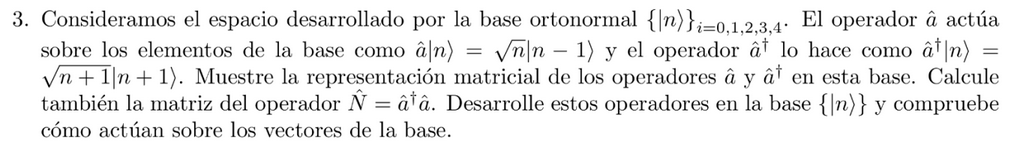

# 5.

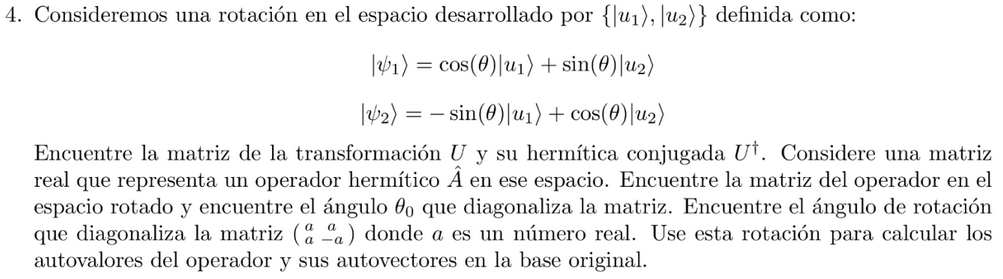